In [1]:
#Let's take some of my thesis data and cluster it. I have used computer vision to extract color features for bananas.
#The problem we are fundamentally trying to solve is to distinguish the subjective 'unripe', 'ripe', and 'spoiled' 
#states for bananas

import numpy as np
import pandas as pd
#from sklearn import decomposition
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances_argmin

#Read in data
data = pd.read_excel('clustering_thesis_data.xlsx')

#Drop the 'y' column - let's do this unsupervised
data.drop('Shelf-Life', axis = 1, inplace = True)

print(data.head(5))


   Hue Avg  Hue Min  Hue Max    %G     %Y     %B    a  a Min  a Max
0     23.2        8       29  0.00  45.60  73.93  4.7  -5.67  15.32
1     24.5       10       29  0.00  58.54  54.00  3.7  -1.70  15.12
2     26.2       16       30  0.04  86.64  20.56  2.1  -1.80  13.50
3     27.1       12       30  0.21  98.44   4.47  1.2  -1.20  16.60
4     27.3       17       31  0.10  99.82   0.63  1.0  -1.60   8.00


In [2]:
#Previous thesis work showed that these three features are the best indicators of shelf-life
x = data[['Hue Avg', '%G',  'a']]
X = x.as_matrix()
print(X[1:5, :])

[[ 24.5    0.     3.7 ]
 [ 26.2    0.04   2.1 ]
 [ 27.1    0.21   1.2 ]
 [ 27.3    0.1    1.  ]]


In [9]:
#Let's cluster!
#We know we want three states ('ripe', 'unripe', and 'spoiled')

nclusters = 3
km = KMeans(init = 'k-means++', n_clusters = 3)
km.fit(X)

fig = plt.figure(figsize=(8, 3))
#fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4E9A06', '#FF9C34', '#8B4513']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers = np.sort(km.cluster_centers_, axis=0)
print(k_means_cluster_centers)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

[[ 25.57282609   2.46178261  -5.5525    ]
 [ 29.68636364  43.99954545  -0.94545455]
 [ 36.437625    97.233875     2.4951087 ]]


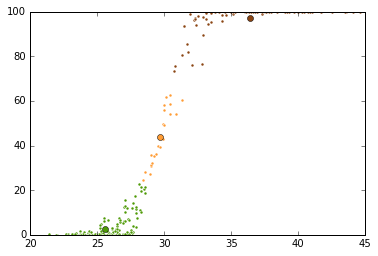

In [10]:
#Let's visualize our clusters
%matplotlib inline
#ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(nclusters+1), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)


In [ ]:
#Great! We have clustered the data to the three states we want